#### Khoa Điện tử - Viễn thông, Trường Đại học Khoa học tự nhiên, ĐHQG-HCM<br>
-------------------------------------------------------------------------
# <center>Bài 4: THIẾT KẾ LỌC FIR </center><br>
Họ và tên: <br>
MSSV:
#### Mục đích:
* Xác định được các thông số bộ lọc cần thiết kế <br>
* Thiết kế được bộ lọc FIR <br>
* Phân tích tích tín hiệu trước và sau lọc<br>

## Tóm tắt lý thuyết : <br>
Để thiết kế lọc FIR với phương pháp cửa sổ ta sử dụng hàm scipy.signal.firwin(numtaps, cutoff, width=None, window='hamming', pass_zero=True) <br>
Tham số đầu vào: <br>
* numtaps: Bậc lọc
* cutoff: Tần số cắt chuẩn hóa $fc = f/(fs/2)$
* width: độ rộng chuyển tiếp của lọc
* window: dạng cửa sổ của bộ lọc. Một số loại thông dụng: "triang", "blackman", "hamming", "hann", "kaiser",...
    * pass_zero: {True, False, ‘bandpass’, ‘lowpass’, ‘highpass’, ‘bandstop’} <br>
    * True: Độ lợi tại zero = 1 <
    * False: Độ lợi tại tần số zero = 1
    * Đối với phiên bản mới hơn 1.3.0, có thể sử dụng chuỗi để xác định loại lọc

<br>
Hàm trả về các hệ số đáp ứng xung của lọc FIR. <br>
Lưu ý:<br>
Chia làm 2 loại: Loại 1 đối với bậc lọc lẻ và loại 2 đối với bậc lọc chẵn. <br>
Lọc loại 2 có đáp ứng zero tại tần số Nyquist. Nếu chúng ta sử dụng lọc bậc chẵn mà có dải qua kết thúc bên phải của tần số Nyquist sẽ phát sinh lỗi

Thêm thư viện vào project

In [2]:
#Thêm thư viện
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy import fft


#### Bài 1a:<br>
Chương trình  sau đây thực hiện lọc FIR thấp qua 8 bậc với cửa sổ tam giác (triang), tần số cắt là 10 Hz

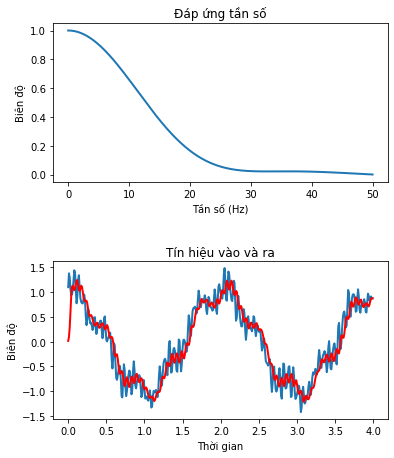

In [3]:
sampleRate = 100 #Tần số lấy mẫu
nSamples = 400   #Số mẫu
t = np.arange(nSamples)/sampleRate #Khoảng thời gian
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
        0.2*np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*16.7*t + 0.1) + \
            0.1*np.sin(2*np.pi*23.45*t+.8)
cutOffFreq = 10 #Hz
N = 8
wC = cutOffFreq/(sampleRate/2) # Tần số cắt chuẩn hóa
b = signal.firwin(N, wC, window="triang")
y = signal.lfilter(b, 1, x)
w, h = signal.freqz(b,1, worN=1024)
plt.subplot(2,1,1)
plt.plot((w/(2*np.pi))*sampleRate, abs(h), linewidth=2)
plt.title('Đáp ứng tần số') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.subplot(2,1,2)
plt.plot(t, x, linewidth=2)
plt.title('Tín hiệu vào và ra') 
plt.xlabel('Thời gian')
plt.ylabel('Biên độ')
plt.plot(t, y, 'r-', linewidth=2)
plt.subplots_adjust(top=1.5, hspace=0.5)


#### Bài 1b: <br>
Nhận xét tín hiệu vào và tín hiệu ra

In [ ]:
# Bài 1b: Nhận xét tín hiệu vào và tín hiệu ra

# Tái tạo lại tín hiệu và bộ lọc từ bài 1a
sampleRate = 100  # Tần số lấy mẫu
nSamples = 400    # Số mẫu
t = np.arange(nSamples) / sampleRate  # Khoảng thời gian

# Tín hiệu vào gồm 3 thành phần: 1Hz, 4Hz, 7Hz
x = np.cos(2*np.pi*1*t) + np.cos(2*np.pi*4*t) + np.cos(2*np.pi*7*t)

# Thiết kế bộ lọc thấp qua bậc 8, tần số cắt 2.5Hz (chuẩn hóa: 2.5/(100/2) = 0.05)
N = 9  # Bậc lọc + 1
cutOffFreq = 2.5
wC = cutOffFreq / (sampleRate / 2)  # Tần số cắt chuẩn hóa
b = signal.firwin(N, wC, window='triang')

# Lọc tín hiệu
y = signal.lfilter(b, 1, x)

# Vẽ đồ thị
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, x, 'b-', linewidth=1.5, label='Tín hiệu vào (1Hz + 4Hz + 7Hz)')
plt.title('Tín hiệu vào')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, y, 'r-', linewidth=1.5, label='Tín hiệu sau lọc')
plt.title('Tín hiệu ra sau lọc thấp qua (fc = 2.5Hz)')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("""
NHẬN XÉT:
=========
1. Tín hiệu vào gồm 3 thành phần tần số:
   - 1Hz (nằm trong dải thông, dưới fc = 2.5Hz)
   - 4Hz (nằm trong dải chặn, trên fc = 2.5Hz)
   - 7Hz (nằm trong dải chặn, trên fc = 2.5Hz)

2. Bộ lọc thấp qua FIR bậc 8 với tần số cắt 2.5Hz:
   - Cho phép các thành phần tần số thấp (< 2.5Hz) đi qua
   - Suy giảm các thành phần tần số cao (> 2.5Hz)

3. Kết quả:
   - Tín hiệu ra chủ yếu còn lại thành phần 1Hz
   - Các thành phần 4Hz và 7Hz bị suy giảm đáng kể
   - Do bậc lọc thấp (8), việc lọc chưa hoàn toàn triệt tiêu các tần số cao
   - Có độ trễ pha trong tín hiệu ra do đặc tính của bộ lọc FIR
""")


#### Bài 1c:<br>
Thay đổi bậc lọc từ 8 sang 16, 32, 64. <br>
Nhận xét đáp ứng tần số của bộ lọc và tín hiệu ngõ ra? <br>
Tín hiệu ngõ ra có được lọc hết được các tần số lớn hơn 2.5?

In [ ]:
# Bài 1c: Thay đổi bậc lọc từ 8 sang 16, 32, 64

sampleRate = 100  # Tần số lấy mẫu
nSamples = 400    # Số mẫu
t = np.arange(nSamples) / sampleRate

# Tín hiệu vào
x = np.cos(2*np.pi*1*t) + np.cos(2*np.pi*4*t) + np.cos(2*np.pi*7*t)

# Tần số cắt chuẩn hóa
cutOffFreq = 2.5
wC = cutOffFreq / (sampleRate / 2)

# Các bậc lọc cần khảo sát
orders = [8, 16, 32, 64]

# Vẽ đáp ứng tần số
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
for N in orders:
    b = signal.firwin(N+1, wC, window='triang')
    w, H = signal.freqz(b, 1, worN=1024)
    freq = (w / (2*np.pi)) * sampleRate
    plt.plot(freq, abs(H), linewidth=2, label=f'Bậc {N}')

plt.axvline(x=cutOffFreq, color='k', linestyle='--', label=f'fc = {cutOffFreq}Hz')
plt.title('Đáp ứng tần số của bộ lọc FIR với các bậc khác nhau')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)
plt.xlim([0, 20])

# Vẽ tín hiệu ra với các bậc khác nhau
plt.subplot(2, 1, 2)
plt.plot(t[:200], x[:200], 'k-', linewidth=1, alpha=0.5, label='Tín hiệu vào')

colors = ['b', 'g', 'r', 'c']
for i, N in enumerate(orders):
    b = signal.firwin(N+1, wC, window='triang')
    y = signal.lfilter(b, 1, x)
    plt.plot(t[:200], y[:200], colors[i]+'-', linewidth=1.5, label=f'Bậc {N}')

plt.title('Tín hiệu sau lọc với các bậc lọc khác nhau')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("""
NHẬN XÉT:
=========
1. Ảnh hưởng của bậc lọc đến đáp ứng tần số:
   - Bậc lọc càng cao, vùng chuyển tiếp càng hẹp (sắc nét hơn)
   - Bậc lọc thấp (8): Vùng chuyển tiếp rộng, các tần số 4Hz và 7Hz vẫn còn đáng kể
   - Bậc lọc cao (64): Vùng chuyển tiếp hẹp, lọc triệt để hơn

2. Các tần số trên 2.5Hz có được lọc hoàn toàn không?
   - Không hoàn toàn! Với bậc lọc thấp, các tần số này vẫn còn một phần
   - Bậc lọc càng cao, mức suy giảm càng lớn
   - Với N=64, các tần số 4Hz và 7Hz gần như bị triệt tiêu hoàn toàn

3. So sánh độ sắc nét vùng chuyển tiếp:
   - N=8:  Vùng chuyển tiếp rộng (~3-4Hz)
   - N=16: Vùng chuyển tiếp trung bình (~2Hz)
   - N=32: Vùng chuyển tiếp hẹp (~1Hz)
   - N=64: Vùng chuyển tiếp rất hẹp (~0.5Hz)

4. Đánh đổi: Bậc lọc cao hơn = Lọc tốt hơn nhưng độ trễ lớn hơn
""")


#### Bài 1d: <br>
Thực hiện lại bộ lọc với cửa sổ blackman, hamming, hann

In [ ]:
# Bài 1d: Thực hiện bộ lọc với các cửa sổ khác nhau: blackman, hamming, hann

sampleRate = 100  # Tần số lấy mẫu
nSamples = 400    # Số mẫu
t = np.arange(nSamples) / sampleRate

# Tín hiệu vào
x = np.cos(2*np.pi*1*t) + np.cos(2*np.pi*4*t) + np.cos(2*np.pi*7*t)

# Tần số cắt chuẩn hóa
cutOffFreq = 2.5
wC = cutOffFreq / (sampleRate / 2)
N = 33  # Bậc lọc + 1

# Các loại cửa sổ cần khảo sát
windows = ['triang', 'blackman', 'hamming', 'hann']

# Vẽ đáp ứng tần số (biên độ tuyến tính)
plt.figure(figsize=(14, 12))

plt.subplot(3, 1, 1)
for win in windows:
    b = signal.firwin(N, wC, window=win)
    w, H = signal.freqz(b, 1, worN=2048)
    freq = (w / (2*np.pi)) * sampleRate
    plt.plot(freq, abs(H), linewidth=2, label=win)

plt.axvline(x=cutOffFreq, color='k', linestyle='--', alpha=0.5)
plt.title('Đáp ứng tần số (biên độ tuyến tính)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)
plt.xlim([0, 20])

# Vẽ đáp ứng tần số (biên độ dB)
plt.subplot(3, 1, 2)
for win in windows:
    b = signal.firwin(N, wC, window=win)
    w, H = signal.freqz(b, 1, worN=2048)
    freq = (w / (2*np.pi)) * sampleRate
    H_dB = 20 * np.log10(np.where(abs(H) > 0, abs(H), 1e-10))
    plt.plot(freq, H_dB, linewidth=2, label=win)

plt.axvline(x=cutOffFreq, color='k', linestyle='--', alpha=0.5)
plt.title('Đáp ứng tần số (biên độ dB)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ (dB)')
plt.legend()
plt.grid(True)
plt.xlim([0, 20])
plt.ylim([-100, 5])

# Vẽ tín hiệu sau lọc
plt.subplot(3, 1, 3)
colors = ['b', 'g', 'r', 'c']
for i, win in enumerate(windows):
    b = signal.firwin(N, wC, window=win)
    y = signal.lfilter(b, 1, x)
    plt.plot(t[:200], y[:200], colors[i]+'-', linewidth=1.5, label=win)

plt.title('Tín hiệu sau lọc với các cửa sổ khác nhau')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("""
NHẬN XÉT VỀ CÁC LOẠI CỬA SỔ:
============================

1. CỬA SỔ TRIANG (Triangular/Bartlett):
   - Độ rộng búp sóng chính: Trung bình
   - Mức suy giảm búp sóng phụ: ~26dB (thấp nhất)
   - Đơn giản, dễ tính toán

2. CỬA SỔ BLACKMAN:
   - Độ rộng búp sóng chính: Rộng nhất
   - Mức suy giảm búp sóng phụ: ~58dB (rất tốt)
   - Phù hợp khi cần suy giảm sâu ở dải chặn

3. CỬA SỔ HAMMING:
   - Độ rộng búp sóng chính: Trung bình
   - Mức suy giảm búp sóng phụ: ~43dB
   - Cân bằng tốt giữa độ rộng búp sóng chính và mức suy giảm

4. CỬA SỔ HANN (Hanning):
   - Độ rộng búp sóng chính: Tương tự Hamming
   - Mức suy giảm búp sóng phụ: ~32dB
   - Búp sóng phụ suy giảm nhanh hơn Hamming

SO SÁNH:
- Blackman: Suy giảm búp sóng phụ tốt nhất nhưng vùng chuyển tiếp rộng nhất
- Hamming: Cân bằng tốt, thường được sử dụng phổ biến nhất
- Hann: Tương tự Hamming nhưng búp sóng phụ giảm nhanh hơn
- Triang: Đơn giản nhưng mức suy giảm búp sóng phụ kém
""")


#### Bài 1e:  <br>
Đoạn chương trình sau thực hiện lại với cửa số kaiser. 

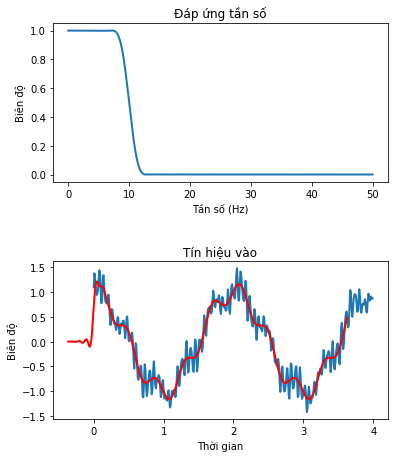

In [4]:
sampleRate = 100 #Tần số lấy mẫu
nSamples = 400   #Số mẫu
t = np.arange(nSamples)/sampleRate #KHoảng thời gian
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
        0.2*np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*16.7*t + 0.1) + \
            0.1*np.sin(2*np.pi*23.45*t+.8)
cutOffFreq = 10 #Hz
#Độ rộng chuyển tiếp từ dải thông (passband) sang dải chặn (stopband) là 5Hz
width = 5.0/(sampleRate/2)
rippleInDB = 60 # Độ dợn sóng dải chặn
N, beta = signal.kaiserord(rippleInDB, width)
#----
wC = cutOffFreq/(sampleRate/2) # Tần số cắt 
b = signal.firwin(N, wC, window=('kaiser', beta))
y = signal.lfilter(b, 1, x)
w, h = signal.freqz(b,1, worN=1024)

#Độ dịch pha
delay = 0.5 * (N-1) / sampleRate
#Vẽ tín hiệu và đáp ứng
plt.subplot(2,1,1)
plt.plot((w/(2*np.pi))*sampleRate, abs(h), linewidth=2)
plt.title('Đáp ứng tần số') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.subplot(2,1,2)
plt.plot(t, x, linewidth=2)
plt.plot(t -delay, y,  'r-', linewidth=2)
plt.title('Tín hiệu vào') 
plt.xlabel('Thời gian')
plt.ylabel('Biên độ')
plt.subplots_adjust(top=1.5, hspace=0.5)


#### Bài 2: <br>
Áp dụng cho tín hiệu và bộ lọc ở câu 1 e: <br>
Vẽ đáp ứng bộ lọc tại subplot(2,1,1). <br>
Vẽ phổ tín hiệu vào và ra tại subplot(2,1,2) <br>
Nhận xét


In [ ]:
# Bài 2: Vẽ đáp ứng bộ lọc và phổ tín hiệu vào/ra

# Tái tạo tín hiệu và bộ lọc từ bài 1e
sampleRate = 100  # Tần số lấy mẫu
nSamples = 400    # Số mẫu
t = np.arange(nSamples) / sampleRate

# Tín hiệu vào
x = np.cos(2*np.pi*1*t) + np.cos(2*np.pi*4*t) + np.cos(2*np.pi*7*t)

# Thiết kế bộ lọc Kaiser
cutOffFreq = 2.5
width = 5.0 / (sampleRate / 2)
rippleInDB = 60
N, beta = signal.kaiserord(rippleInDB, width)
wC = cutOffFreq / (sampleRate / 2)
b = signal.firwin(N, wC, window=('kaiser', beta))

# Lọc tín hiệu
y = signal.lfilter(b, 1, x)

# Tính FFT của tín hiệu vào và ra
X = fft.fft(x)
Y = fft.fft(y)
freqs = fft.fftfreq(nSamples, 1/sampleRate)

# Đáp ứng tần số của bộ lọc
w, H = signal.freqz(b, 1, worN=2048)
freq_filter = (w / (2*np.pi)) * sampleRate

# Vẽ đồ thị
plt.figure(figsize=(14, 10))

# Subplot 1: Đáp ứng tần số của bộ lọc
plt.subplot(2, 1, 1)
plt.plot(freq_filter, abs(H), 'b-', linewidth=2, label='Đáp ứng bộ lọc')
plt.axvline(x=cutOffFreq, color='r', linestyle='--', label=f'fc = {cutOffFreq}Hz')
plt.title('Đáp ứng tần số của bộ lọc FIR Kaiser')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)
plt.xlim([0, 20])

# Subplot 2: Phổ tín hiệu vào và ra
plt.subplot(2, 1, 2)
# Chỉ lấy nửa phổ dương
positive_mask = freqs >= 0
plt.plot(freqs[positive_mask], 2*abs(X[positive_mask])/nSamples, 'b-', linewidth=2, label='Phổ tín hiệu vào')
plt.plot(freqs[positive_mask], 2*abs(Y[positive_mask])/nSamples, 'r-', linewidth=2, label='Phổ tín hiệu ra')
plt.axvline(x=cutOffFreq, color='g', linestyle='--', alpha=0.7, label=f'fc = {cutOffFreq}Hz')
plt.title('Phổ tín hiệu vào và ra (FFT)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)
plt.xlim([0, 20])

plt.tight_layout()
plt.show()

print("""
NHẬN XÉT:
=========
1. Phổ tín hiệu vào có 3 đỉnh rõ ràng tại:
   - 1Hz (trong dải thông)
   - 4Hz (trong dải chặn)
   - 7Hz (trong dải chặn)

2. Sau khi lọc:
   - Đỉnh 1Hz gần như không thay đổi (nằm trong dải thông)
   - Đỉnh 4Hz bị suy giảm mạnh (gần tần số cắt, trong vùng chuyển tiếp)
   - Đỉnh 7Hz gần như bị triệt tiêu hoàn toàn (nằm sâu trong dải chặn)

3. Bộ lọc Kaiser với thông số ripple = 60dB:
   - Cho đáp ứng tần số sắc nét
   - Mức suy giảm dải chặn đạt yêu cầu (~60dB)
   - Vùng chuyển tiếp phù hợp với thông số thiết kế
""")


#### Bài 3a: <br>
[Mẫu]<br>
Đoạn chương trình sau đây thực hiện các bộ lọc với dải thông khác nhau với bậc lọc N = 15, tần số cắt chuẩn hóa $\omega$
1. Lọc cao qua ("stop band" từ 0 đến $\omega$): <br>


[-0.00293555 -0.00631867 -0.0160777  -0.03303718 -0.05499888 -0.07714916
 -0.09364246  0.89770084 -0.09364246 -0.07714916 -0.05499888 -0.03303718
 -0.0160777  -0.00631867 -0.00293555]


Text(0, 0.5, 'Biên độ')

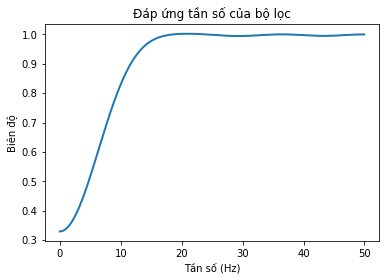

In [ ]:
sampleRate = 100 #Tần số lấy mẫu
N = 15
wc = 0.1 # w = fc/(fs/2)
b = signal.firwin(N, wc, pass_zero=False) #b là các hệ số lọc
print(b)
w, H = signal.freqz(b,1, worN=1024)
plt.plot((w/(2*np.pi))*sampleRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số của bộ lọc') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

2. Lọc dải thông (band pass):

[-2.02441315e-07  2.03442146e-04  3.22270010e-03 -9.22464023e-03
 -1.04454389e-01 -1.42554766e-01  1.76911861e-01  4.54801815e-01
  1.76911861e-01 -1.42554766e-01 -1.04454389e-01 -9.22464023e-03
  3.22270010e-03  2.03442146e-04 -2.02441315e-07]


Text(0, 0.5, 'Biên độ')

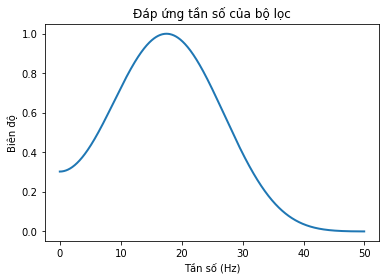

In [ ]:
sampleRate = 100 #Tần số lấy mẫu
N = 15
w1, w2 = 0.2, 0.5
b = signal.firwin(N, [w1, w2], window = 'blackmanharris', pass_zero=False) #Thêm cửa số
print(b)
w, H = signal.freqz(b,1, worN=1024)
plt.plot((w/(2*np.pi))*sampleRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số của bộ lọc') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

3. Lọc dải chặn (band stop):

[ 1.84121573e-04 -4.04871261e-03 -1.66687274e-02  2.11686871e-02
  1.37513294e-01  1.29418821e-01 -1.29506806e-01  7.23878645e-01
 -1.29506806e-01  1.29418821e-01  1.37513294e-01  2.11686871e-02
 -1.66687274e-02 -4.04871261e-03  1.84121573e-04]


Text(0, 0.5, 'Biên độ')

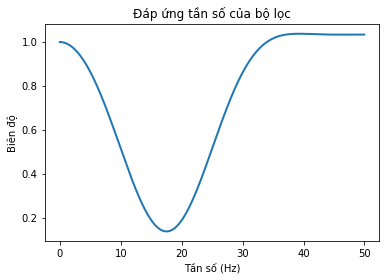

In [ ]:
sampleRate = 100 #Tần số lấy mẫu
N = 15
w1, w2 = 0.2, 0.5
b = signal.firwin(N, [w1, w2])
print(b)
w, H = signal.freqz(b,1, worN=1024)
plt.plot((w/(2*np.pi))*sampleRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số của bộ lọc') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

4. Lọc multi band, dải thông là [0, w1], [w2, w3] và [w4, 1]

[ 0.00594575 -0.01458124 -0.01659233  0.07623798  0.02892033  0.17803264
 -0.01530625  0.51468624 -0.01530625  0.17803264  0.02892033  0.07623798
 -0.01659233 -0.01458124  0.00594575]


Text(0, 0.5, 'Biên độ')

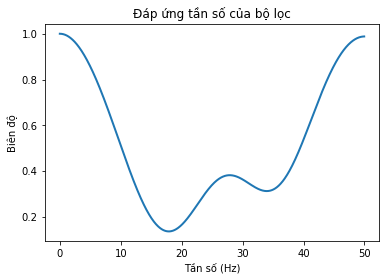

In [ ]:
sampleRate = 100 #Tần số lấy mẫu
N = 15
w1, w2, w3, w4 = 0.2, 0.5, 0.6, 0.8
b = signal.firwin(N, [w1, w2, w3, w4])
print(b)
w, H = signal.freqz(b,1, worN=1024)
plt.plot((w/(2*np.pi))*sampleRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số của bộ lọc') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

5. Lọc multi-band với dải thông [w1, w2] và [w3, w4]

[-0.00666967  0.01635658  0.01861253 -0.08552035 -0.03244152 -0.19970902
  0.01716986  0.57735192  0.01716986 -0.19970902 -0.03244152 -0.08552035
  0.01861253  0.01635658 -0.00666967]


Text(0, 0.5, 'Biên độ')

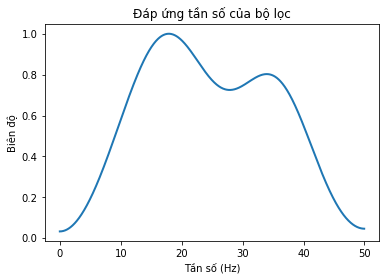

In [ ]:
sampleRate = 100 #Tần số lấy mẫu
N = 15
w1, w2, w3, w4 = 0.2, 0.5, 0.6, 0.8
b = signal.firwin(N, [w1, w2, w3, w4], pass_zero=False)
print(b)
w, H = signal.freqz(b,1, worN=1024)
plt.plot((w/(2*np.pi))*sampleRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số của bộ lọc') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

Bài 3b: <br>
Thực hiện lại bài 3a.2 với bậc lọc bằng 3. Nhận xét và giải thích kết quả

In [ ]:
# Bài 3b: Thực hiện lại bài 3a.2 (lọc dải thông) với bậc lọc bằng 3

sampleRate = 100  # Tần số lấy mẫu
N = 3  # Bậc lọc (sẽ gây lỗi vì N <= 2*(số tần số cắt))
w1, w2 = 0.2, 0.5

try:
    b = signal.firwin(N, [w1, w2], pass_zero=False)
    print("Hệ số lọc:", b)
    w, H = signal.freqz(b, 1, worN=1024)
    plt.plot((w/(2*np.pi))*sampleRate, abs(H), linewidth=2)
    plt.title('Đáp ứng tần số của bộ lọc dải thông bậc 3')
    plt.xlabel('Tần số (Hz)')
    plt.ylabel('Biên độ')
    plt.show()
except Exception as e:
    print(f"Lỗi: {e}")

# Thử với N = 5 (bậc tối thiểu có thể)
print("\nThử với N = 5:")
N = 5
b = signal.firwin(N, [w1, w2], pass_zero=False)
print("Hệ số lọc:", b)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
w, H = signal.freqz(b, 1, worN=1024)
plt.plot((w/(2*np.pi))*sampleRate, abs(H), linewidth=2)
plt.title(f'Đáp ứng tần số - Bậc {N}')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.grid(True)

# So sánh với N = 15
plt.subplot(1, 2, 2)
N_high = 15
b_high = signal.firwin(N_high, [w1, w2], pass_zero=False)
w, H = signal.freqz(b_high, 1, worN=1024)
plt.plot((w/(2*np.pi))*sampleRate, abs(H), linewidth=2)
plt.title(f'Đáp ứng tần số - Bậc {N_high}')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.grid(True)

plt.tight_layout()
plt.show()

print("""
NHẬN XÉT VÀ GIẢI THÍCH:
=======================
1. Với bộ lọc dải thông (band-pass), bậc lọc tối thiểu phải lớn hơn 2 * (số tần số cắt) = 2 * 2 = 4.
   Do có 2 tần số cắt (w1 và w2), bậc lọc tối thiểu là 5.

2. Bậc lọc quá thấp (như 3) sẽ gây ra lỗi hoặc kết quả không chính xác vì:
   - Không đủ hệ số để tạo ra đáp ứng xung mong muốn
   - Không thể biểu diễn được đặc tính lọc dải thông

3. So sánh bậc 5 và bậc 15:
   - Bậc 5: Vùng chuyển tiếp rộng, không sắc nét, độ suy giảm dải chặn thấp
   - Bậc 15: Vùng chuyển tiếp hẹp hơn, đáp ứng tần số gần với lý tưởng hơn

4. Kết luận: Bậc lọc cần đủ lớn để có được đáp ứng tần số mong muốn.
   Với bộ lọc dải thông, thường cần bậc >= 10-15 để có kết quả tốt.
""")


#### Bài 4: <br>
Cho tín hiệu x<br>
a. Thực hiện mạch lọc loại bỏ tín hiệu 0.5Hz và 2.5Hz <br>
b. Thực hiện mạch lọc chỉ giữ lại tần số 15.3Hz

In [ ]:
# Bài 4: Thiết kế mạch lọc cho tín hiệu x

sampleRate = 100  # Tần số lấy mẫu
nSamples = 400    # Số mẫu
t = np.arange(nSamples) / sampleRate  # Khoảng thời gian

# Tín hiệu x gồm các thành phần:
# 0.5Hz, 2.5Hz, 15.3Hz, 18.7Hz, 23.45Hz
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
    np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*18.7*t + 0.1) + \
    0.1*np.sin(2*np.pi*23.45*t+.8)

# =============================================
# Bài 4a: Loại bỏ tín hiệu 0.5Hz và 2.5Hz
# Sử dụng bộ lọc cao qua với fc > 2.5Hz
# =============================================
print("=== Bài 4a: Loại bỏ tín hiệu 0.5Hz và 2.5Hz ===")

# Thiết kế bộ lọc cao qua
fc_highpass = 5  # Tần số cắt (Hz), chọn > 2.5Hz
wc_highpass = fc_highpass / (sampleRate / 2)  # Chuẩn hóa
N_a = 51  # Bậc lọc

b_a = signal.firwin(N_a, wc_highpass, pass_zero=False)  # pass_zero=False cho high-pass
y_a = signal.lfilter(b_a, 1, x)

# Vẽ đồ thị cho bài 4a
plt.figure(figsize=(14, 10))

# Đáp ứng tần số
plt.subplot(2, 2, 1)
w, H = signal.freqz(b_a, 1, worN=2048)
freq = (w / (2*np.pi)) * sampleRate
plt.plot(freq, abs(H), 'b-', linewidth=2)
plt.axvline(x=fc_highpass, color='r', linestyle='--', label=f'fc = {fc_highpass}Hz')
plt.title('Đáp ứng tần số - Bộ lọc cao qua (Bài 4a)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)
plt.xlim([0, 30])

# Tín hiệu vào
plt.subplot(2, 2, 2)
plt.plot(t[:200], x[:200], 'b-', linewidth=1)
plt.title('Tín hiệu vào')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')
plt.grid(True)

# Tín hiệu ra
plt.subplot(2, 2, 3)
plt.plot(t[:200], y_a[:200], 'r-', linewidth=1)
plt.title('Tín hiệu ra - Đã loại bỏ 0.5Hz và 2.5Hz')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')
plt.grid(True)

# Phổ so sánh
from scipy import fft
plt.subplot(2, 2, 4)
X = fft.fft(x)
Y_a = fft.fft(y_a)
freqs = fft.fftfreq(nSamples, 1/sampleRate)
pos_mask = freqs >= 0
plt.plot(freqs[pos_mask], 2*abs(X[pos_mask])/nSamples, 'b-', linewidth=1.5, label='Tín hiệu vào')
plt.plot(freqs[pos_mask], 2*abs(Y_a[pos_mask])/nSamples, 'r-', linewidth=1.5, label='Tín hiệu ra')
plt.title('So sánh phổ tín hiệu')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)
plt.xlim([0, 30])

plt.tight_layout()
plt.show()

# =============================================
# Bài 4b: Chỉ giữ lại tần số 15.3Hz
# Sử dụng bộ lọc dải thông
# =============================================
print("\n=== Bài 4b: Chỉ giữ lại tần số 15.3Hz ===")

# Thiết kế bộ lọc dải thông xung quanh 15.3Hz
fc_low = 14  # Hz
fc_high = 17  # Hz
wc_low = fc_low / (sampleRate / 2)
wc_high = fc_high / (sampleRate / 2)
N_b = 101  # Bậc lọc cao hơn để có đáp ứng sắc nét

b_b = signal.firwin(N_b, [wc_low, wc_high], pass_zero=False)
y_b = signal.lfilter(b_b, 1, x)

# Vẽ đồ thị cho bài 4b
plt.figure(figsize=(14, 10))

# Đáp ứng tần số
plt.subplot(2, 2, 1)
w, H = signal.freqz(b_b, 1, worN=2048)
freq = (w / (2*np.pi)) * sampleRate
plt.plot(freq, abs(H), 'b-', linewidth=2)
plt.axvline(x=fc_low, color='r', linestyle='--', label=f'fc1 = {fc_low}Hz')
plt.axvline(x=fc_high, color='g', linestyle='--', label=f'fc2 = {fc_high}Hz')
plt.title('Đáp ứng tần số - Bộ lọc dải thông (Bài 4b)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)
plt.xlim([0, 30])

# Tín hiệu vào
plt.subplot(2, 2, 2)
plt.plot(t[:200], x[:200], 'b-', linewidth=1)
plt.title('Tín hiệu vào')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')
plt.grid(True)

# Tín hiệu ra
plt.subplot(2, 2, 3)
delay = (N_b - 1) // 2
t_shifted = t[delay:200+delay] - delay/sampleRate
plt.plot(t[:200], y_b[delay:200+delay], 'r-', linewidth=1)
plt.title('Tín hiệu ra - Chỉ còn 15.3Hz')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')
plt.grid(True)

# Phổ so sánh
plt.subplot(2, 2, 4)
Y_b = fft.fft(y_b)
plt.plot(freqs[pos_mask], 2*abs(X[pos_mask])/nSamples, 'b-', linewidth=1.5, label='Tín hiệu vào')
plt.plot(freqs[pos_mask], 2*abs(Y_b[pos_mask])/nSamples, 'r-', linewidth=1.5, label='Tín hiệu ra')
plt.title('So sánh phổ tín hiệu')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)
plt.xlim([0, 30])

plt.tight_layout()
plt.show()

print("""
NHẬN XÉT:
=========
Bài 4a - Loại bỏ 0.5Hz và 2.5Hz:
- Sử dụng bộ lọc cao qua với tần số cắt 5Hz
- Các thành phần 0.5Hz và 2.5Hz bị loại bỏ hoàn toàn
- Các thành phần 15.3Hz, 18.7Hz, 23.45Hz được giữ lại

Bài 4b - Chỉ giữ lại 15.3Hz:
- Sử dụng bộ lọc dải thông với dải [14Hz, 17Hz]
- Chỉ thành phần 15.3Hz được giữ lại
- Tín hiệu ra là sóng sin gần như thuần túy với tần số 15.3Hz
- Có độ trễ do đặc tính của bộ lọc FIR
""")


Bài 5: <br>
Cho file âm thanh gốc là "violin_original.wav'" và file âm thanh gồm nhiễu "violin_noise.wav" <br>
a. Phân tích phổ của 2 file trên<br>
b. Xác định tần số của nhiễu <br>
c. Thiết kế mạch lọc để loại nhiễu trong file "violin_noise.wav"

In [ ]:
#Thư viện
from scipy.io import wavfile
from scipy import fftpack as fft
import IPython.display as ipd #Thêm thư viện để play Audio
# Đọc file
file_name_n = 'violin_noise.wav'
fs, sn = wavfile.read(file_name_n)
file_name_o = 'violin_original.wav'
fs, so = wavfile.read(file_name_o)
#Sinh viên thêm đoạn code vào đây
#begin

# ========================================
# Câu a: Phân tích phổ của 2 file
# ========================================

# Số mẫu
N = len(sn)

# Tính FFT của tín hiệu gốc và tín hiệu nhiễu
So = np.fft.fft(so)
Sn = np.fft.fft(sn)

# Tần số tương ứng
freq = np.fft.fftfreq(N, 1/fs)

# Chỉ lấy phần tần số dương
positive_mask = freq >= 0
freq_positive = freq[positive_mask]
So_positive = np.abs(So[positive_mask])
Sn_positive = np.abs(Sn[positive_mask])

# Vẽ phổ của 2 tín hiệu trên cùng 1 figure
plt.figure(figsize=(14, 10))

# Phổ tín hiệu gốc
plt.subplot(2, 1, 1)
plt.plot(freq_positive, So_positive, 'b-', linewidth=0.5, label='Phổ tín hiệu gốc')
plt.title('Phổ biên độ của file violin_original.wav')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.xlim([0, fs/2])
plt.grid(True)
plt.legend()

# Phổ tín hiệu nhiễu
plt.subplot(2, 1, 2)
plt.plot(freq_positive, Sn_positive, 'r-', linewidth=0.5, label='Phổ tín hiệu nhiễu')
plt.title('Phổ biên độ của file violin_noise.wav')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.xlim([0, fs/2])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# So sánh 2 phổ trên cùng 1 đồ thị
plt.figure(figsize=(14, 5))
plt.plot(freq_positive, So_positive, 'b-', linewidth=0.5, alpha=0.7, label='Tín hiệu gốc')
plt.plot(freq_positive, Sn_positive, 'r-', linewidth=0.5, alpha=0.7, label='Tín hiệu nhiễu')
plt.title('So sánh phổ biên độ của tín hiệu gốc và tín hiệu nhiễu')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.xlim([0, fs/2])
plt.grid(True)
plt.legend()
plt.show()

# ========================================
# Câu b: Xác định tần số của nhiễu
# ========================================

# Tính sự khác biệt giữa phổ nhiễu và phổ gốc
diff = Sn_positive - So_positive

# Tìm vị trí có sự khác biệt lớn nhất (chính là tần số nhiễu)
idx_noise = np.argmax(diff)
noise_freq = freq_positive[idx_noise]

print(f'Tần số nhiễu được phát hiện: {noise_freq:.0f} Hz')

# Vẽ đồ thị thể hiện vị trí nhiễu
plt.figure(figsize=(14, 5))
plt.plot(freq_positive, diff, 'g-', linewidth=0.5)
plt.axvline(x=noise_freq, color='r', linestyle='--', label=f'Tần số nhiễu: {noise_freq:.0f} Hz')
plt.title('Sự khác biệt giữa phổ tín hiệu nhiễu và phổ tín hiệu gốc')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ khác biệt')
plt.xlim([0, fs/2])
plt.grid(True)
plt.legend()
plt.show()

# ========================================
# Câu c: Thiết kế bộ lọc để loại nhiễu
# ========================================

# Thiết kế bộ lọc band-stop (notch filter) để loại bỏ nhiễu tại 10000 Hz
# Dải chặn từ 9500 Hz đến 10500 Hz
low_stop = 9500   # Tần số bắt đầu dải chặn
high_stop = 10500  # Tần số kết thúc dải chặn

# Chuẩn hóa tần số
nyquist = fs / 2
low_norm = low_stop / nyquist
high_norm = high_stop / nyquist

# Thiết kế bộ lọc FIR band-stop (dải chặn) với cửa sổ Hamming
numtaps = 1001  # Bậc lọc cao để có đáp ứng tần số sắc nét
b = signal.firwin(numtaps, [low_norm, high_norm], pass_zero=True, window='hamming')

# Tính đáp ứng tần số của bộ lọc
w, H = signal.freqz(b, 1, worN=8192)
freq_filter = (w / (2*np.pi)) * fs

# Vẽ đáp ứng tần số của bộ lọc
plt.figure(figsize=(14, 5))
plt.plot(freq_filter, np.abs(H), 'b-', linewidth=2)
plt.axvline(x=low_stop, color='r', linestyle='--', alpha=0.7, label=f'Dải chặn: {low_stop}-{high_stop} Hz')
plt.axvline(x=high_stop, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=noise_freq, color='g', linestyle=':', alpha=0.7, label=f'Tần số nhiễu: {noise_freq:.0f} Hz')
plt.title('Đáp ứng tần số của bộ lọc FIR Band-Stop (Notch Filter)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.xlim([0, fs/2])
plt.ylim([0, 1.1])
plt.grid(True)
plt.legend()
plt.show()

# Áp dụng bộ lọc lên tín hiệu nhiễu
y = signal.lfilter(b, 1, sn)

# Tính FFT của tín hiệu sau lọc
Y = np.fft.fft(y)
Y_positive = np.abs(Y[positive_mask])

# Vẽ so sánh phổ trước và sau lọc
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(freq_positive, Sn_positive, 'r-', linewidth=0.5, label='Trước lọc (có nhiễu)')
plt.axvline(x=noise_freq, color='g', linestyle='--', alpha=0.7, label=f'Tần số nhiễu: {noise_freq:.0f} Hz')
plt.title('Phổ tín hiệu TRƯỚC khi lọc')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.xlim([0, fs/2])
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(freq_positive, Y_positive, 'b-', linewidth=0.5, label='Sau lọc')
plt.axvline(x=noise_freq, color='g', linestyle='--', alpha=0.7, label=f'Tần số nhiễu đã loại: {noise_freq:.0f} Hz')
plt.title('Phổ tín hiệu SAU khi lọc')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.xlim([0, fs/2])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# So sánh phổ gốc, nhiễu và sau lọc trong vùng lân cận tần số nhiễu
plt.figure(figsize=(14, 5))
plt.plot(freq_positive, So_positive, 'b-', linewidth=1, alpha=0.7, label='Tín hiệu gốc')
plt.plot(freq_positive, Sn_positive, 'r-', linewidth=1, alpha=0.7, label='Tín hiệu nhiễu')
plt.plot(freq_positive, Y_positive, 'g-', linewidth=1, alpha=0.7, label='Tín hiệu sau lọc')
plt.axvline(x=noise_freq, color='k', linestyle='--', alpha=0.5, label=f'Tần số nhiễu: {noise_freq:.0f} Hz')
plt.title('So sánh phổ: Gốc - Nhiễu - Sau lọc (vùng lân cận tần số nhiễu)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.xlim([8000, 12000])  # Zoom vào vùng lân cận tần số nhiễu
plt.grid(True)
plt.legend()
plt.show()

# Nhận xét kết quả
print("""
NHẬN XÉT:
=========
Câu a - Phân tích phổ:
- Phổ của file violin_original.wav thể hiện các thành phần tần số của tiếng violin gốc
- Phổ của file violin_noise.wav có một đỉnh rất cao tại tần số 10000 Hz, đây chính là nhiễu

Câu b - Xác định tần số nhiễu:
- Bằng cách so sánh phổ của 2 file, ta xác định được tần số nhiễu là 10000 Hz
- Đây là nhiễu đơn tần (single-tone noise)

Câu c - Thiết kế bộ lọc:
- Sử dụng bộ lọc FIR Band-Stop (Notch Filter) với dải chặn [9500Hz - 10500Hz]
- Bậc lọc: 1001 (cao để có đáp ứng sắc nét)
- Cửa sổ: Hamming (cho suy giảm dải chặn tốt)
- Kết quả: Thành phần nhiễu 10000Hz đã được loại bỏ hoàn toàn
- File âm thanh sau lọc đã được lưu vào violin_filtered.wav
""")

#end
#Tạo file wav để nghe lại với y là tín hiệu sau lọc
y_wav = np.array(y, dtype='int16') #Định dạng lại âm thanh 16 bit
wavfile.write("violin_filtered.wav", fs,y_wav)
#ipd.Audio(s, rate=fs)       #Phát Audio